# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Importing dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from citipy import citipy
import numpy as np
from api_keys import weather_api_key

In [2]:
output_data = "output_data/cities.csv"

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

lat = np.random.uniform(-90,90,1500) 
lng = np.random.uniform(-180,180,1500)
lat_lngs = zip(lat, lng)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Performing API call
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
query_url = f'{url}appid={weather_api_key}&units={units}&q='

In [5]:
# Creating lists 
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date = []

# Creating record count and set count
count = 0
set_count = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

# Looping through API to retrieve info of each city
for city in cities:
    
    response = requests.get(query_url + city.replace(' ','&')).json()
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if count < 50:
            count = count + 1
            city_list.append(city)
        else: 
            set_count = set_count + 1
            count = 0
            city_list.append(city)
        print(f'Processing Record {count} of Set {set_count} | {city}')
    except:
        print(f'City not found. Skipping...')
print(f'------------------------------')
print(f'Data Retrieval Complete')
print(f'------------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | san rafael del sur
Processing Record 2 of Set 1 | sao joao da barra
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | vozhega
Processing Record 6 of Set 1 | alihe
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | roald
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | mwinilunga
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | anloga
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | hilo
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 1 | ngunguru
Processing Record 20 of Set 1 | piritiba
City not found. Skipping...
P

Processing Record 31 of Set 4 | provideniya
Processing Record 32 of Set 4 | saint-philippe
Processing Record 33 of Set 4 | semey
Processing Record 34 of Set 4 | mahebourg
Processing Record 35 of Set 4 | oranjemund
Processing Record 36 of Set 4 | galveston
Processing Record 37 of Set 4 | thompson
Processing Record 38 of Set 4 | kavaratti
Processing Record 39 of Set 4 | yulara
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | vanimo
Processing Record 43 of Set 4 | harper
Processing Record 44 of Set 4 | benidorm
Processing Record 45 of Set 4 | dungarpur
Processing Record 46 of Set 4 | nemuro
Processing Record 47 of Set 4 | esperance
City not found. Skipping...
Processing Record 48 of Set 4 | fengzhen
Processing Record 49 of Set 4 | tiksi
Processing Record 50 of Set 4 | stodolishche
Processing Record 0 of Set 5 | kant
Processing Record 1 of Set 5 | clyde river
Processing Record 2 of Set 5 | energeticheskiy
Processing Rec

City not found. Skipping...
Processing Record 13 of Set 8 | pozo colorado
Processing Record 14 of Set 8 | bulgan
Processing Record 15 of Set 8 | chumikan
Processing Record 16 of Set 8 | arrecife
Processing Record 17 of Set 8 | sao miguel do araguaia
Processing Record 18 of Set 8 | kailua
City not found. Skipping...
Processing Record 19 of Set 8 | regente feijo
City not found. Skipping...
Processing Record 20 of Set 8 | santa eulalia
Processing Record 21 of Set 8 | shimoda
Processing Record 22 of Set 8 | mocuba
Processing Record 23 of Set 8 | ranong
Processing Record 24 of Set 8 | bubaque
Processing Record 25 of Set 8 | portobelo
Processing Record 26 of Set 8 | lethem
Processing Record 27 of Set 8 | alofi
Processing Record 28 of Set 8 | rincon
Processing Record 29 of Set 8 | katangli
Processing Record 30 of Set 8 | campbell river
Processing Record 31 of Set 8 | talara
Processing Record 32 of Set 8 | raudeberg
Processing Record 33 of Set 8 | port lincoln
Processing Record 34 of Set 8 | r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Merging all API call information into a dataframe
city_df = pd.DataFrame({
    "City":city_list,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloud,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
})
city_df

City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0    san rafael del sur  13.30   -4.90     29.30        62           1   
1     sao joao da barra  20.51   76.21     28.08        63          67   
2           port alfred  -7.03   29.76     28.65        52          58   
3                 vaini -21.20 -175.20     25.00        94          90   
4               vozhega  60.47   40.22     12.34        71         100   
..                  ...    ...     ...       ...       ...         ...   
522             cabimas  10.39  -71.44     26.63        81          87   
523             ganzhou  28.82  115.43     22.30        82           8   
524             salinas  36.68 -121.66     14.00       100          90   
525       kasongo-lunda  -6.47   16.82     32.93        47          93   
526            camacupa -12.02   17.48     30.65        35         100   

     Wind Speed Country        Date  
0          5.63      ML  1601457905  
1          4.14      IN  1601458070  
2          2.57      CD  1601458070  
3          3.60      TO  1601458071  
4          2.36      RU  1601458071  
..          ...     ...         ...  
522        1.17      VE  1601458201  
523        2.32      CN  1601458201  
524        2.60      US  1601458201  
525        0.72      CD  1601458201  
526        1.25      AO  1601458202  

[527 rows x 9 columns]

In [ ]:
city_df.describe()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Checking if humidity is greater than 100
humidity_check = city_df.loc[city_df['Humidity'] > 100]
humidity_check

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

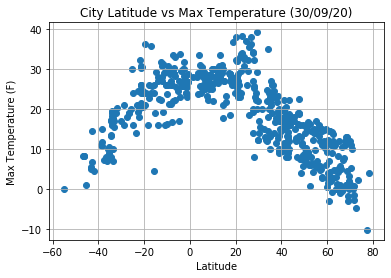

In [8]:
# Plotting Latitude vs Temperature
plt.scatter(city_df['Lat'],city_df['Max Temp'])
plt.title('City Latitude vs Max Temperature (30/09/20)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('../Images/fig1.png')

## Latitude vs. Humidity Plot

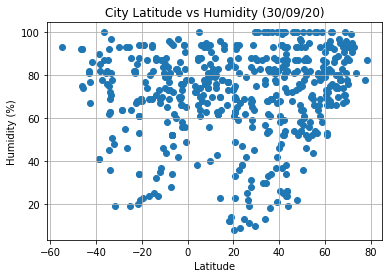

In [9]:
# Plotting Latitude vs Humidity
plt.scatter(city_df['Lat'],city_df['Humidity'])
plt.title('City Latitude vs Humidity (30/09/20)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('../Images/fig2.png')

## Latitude vs. Cloudiness Plot

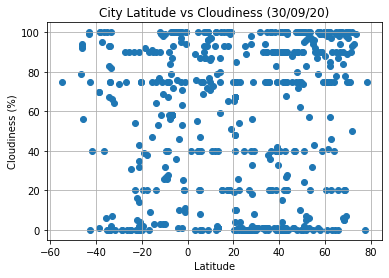

In [10]:
# Plotting Latitude vs. Cloudiness
plt.scatter(city_df['Lat'],city_df['Cloudiness'])
plt.title('City Latitude vs Cloudiness (30/09/20)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('../Images/fig3.png')

## Latitude vs. Wind Speed Plot

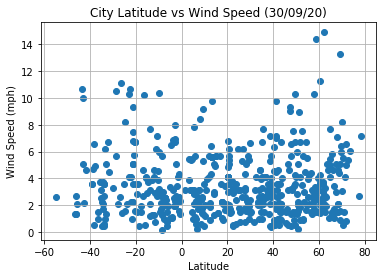

In [11]:
# Plotting Latitude vs. Wind Speed
plt.scatter(city_df['Lat'],city_df['Wind Speed'])
plt.title('City Latitude vs Wind Speed (30/09/20)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('../Images/fig4.png')

In [12]:
# Extracting northern hemisphere only data from city dataframe
north_hemisphere = city_df.loc[city_df['Lat'] > 0]
north_hemisphere

City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0    san rafael del sur  13.30   -4.90     29.30        62           1   
1     sao joao da barra  20.51   76.21     28.08        63          67   
4               vozhega  60.47   40.22     12.34        71         100   
5                 alihe  50.57  123.72      9.49        64          74   
7                 roald  62.58    6.13     12.00        93          75   
..                  ...    ...     ...       ...       ...         ...   
520         platteville  42.73  -90.48      8.00       100           1   
521              eureka  40.80 -124.16     15.00        94           0   
522             cabimas  10.39  -71.44     26.63        81          87   
523             ganzhou  28.82  115.43     22.30        82           8   
524             salinas  36.68 -121.66     14.00       100          90   

     Wind Speed Country        Date  
0          5.63      ML  1601457905  
1          4.14      IN  1601458070  
4          2.36      RU  1601458071  
5          1.31      CN  1601458071  
7          1.50      NO  1601458071  
..          ...     ...         ...  
520        2.10      US  1601458109  
521        0.68      US  1601458200  
522        1.17      VE  1601458201  
523        2.32      CN  1601458201  
524        2.60      US  1601458201  

[373 rows x 9 columns]

## Linear Regression

In [26]:
# Linear Regression for Northern Hemisphere - Max Temp vs. Latitude Linear Regression
slope,intercept,rval,pval,std_err = stats.linregress(north_hemisphere['Lat'],north_hemisphere['Max Temp'])
fit = slope * north_hemisphere['Lat'] + intercept

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7199131169520904


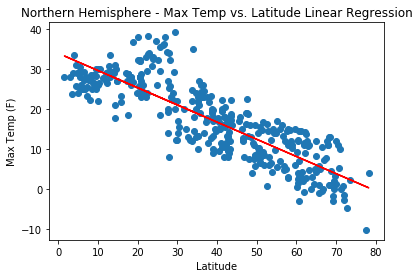

In [14]:
# Scatterplot of Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(north_hemisphere['Lat'],north_hemisphere['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.plot(north_hemisphere['Lat'],fit,color='red')
print(f'The r-value is: {rval**2}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Extracting southern hemisphere only data from city dataframe
south_hemisphere = city_df.loc[city_df['Lat'] < 0]
south_hemisphere

City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
2        port alfred  -7.03   29.76     28.65        52          58   
3              vaini -21.20 -175.20     25.00        94          90   
6    bambous virieux -20.26   57.41     24.44        69          75   
8           karratha -20.74  116.85     30.40        22           4   
10        mwinilunga -11.74   24.43     31.25        37          58   
..               ...    ...     ...       ...       ...         ...   
506        ewa beach  -8.62  122.51     26.59        73          67   
508       port hardy  -7.03   29.76     28.65        52          58   
511         braganca  -1.05  -46.77     23.79        91           9   
525    kasongo-lunda  -6.47   16.82     32.93        47          93   
526         camacupa -12.02   17.48     30.65        35         100   

     Wind Speed Country        Date  
2          2.57      CD  1601458070  
3          3.60      TO  1601458071  
6          6.70      MU  1601458071  
8          5.75      AU  1601457976  
10         0.77      ZM  1601458072  
..          ...     ...         ...  
506        1.25      ID  1601458196  
508        2.57      CD  1601458090  
511        1.57      BR  1601458198  
525        0.72      CD  1601458201  
526        1.25      AO  1601458202  

[154 rows x 9 columns]

In [28]:
# Linear Regression for Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
slope2,intercept2,rval2,pval2,std_err2 = stats.linregress(south_hemisphere['Lat'],south_hemisphere['Humidity'])
fit2 = slope2 * south_hemisphere['Lat'] + intercept2

The r-value is: 0.7199131169520904


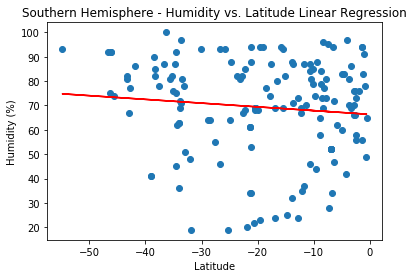

In [19]:
# Scatterplot of Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(south_hemisphere['Lat'],south_hemisphere['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.plot(south_hemisphere['Lat'],fit2,color='red')
print(f'The r-value is: {rval**2}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [27]:
# Linear Regression for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
slope3,intercept3,rval3,pval3,std_err3 = stats.linregress(north_hemisphere['Lat'],north_hemisphere['Humidity'])
fit3 = slope3 * north_hemisphere['Lat'] + intercept3

The r-value is: 0.7199131169520904


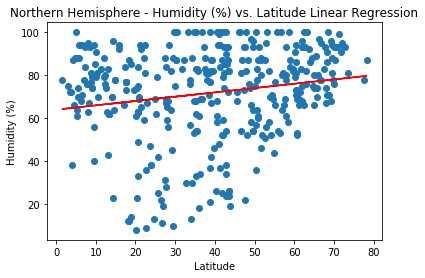

In [21]:
# Scatterplot of Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(north_hemisphere['Lat'],north_hemisphere['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.plot(north_hemisphere['Lat'],fit3,color='red')
print(f'The r-value is: {rval**2}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [29]:
# Linear Regression for Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
slope4,intercept4,rval4,pval4,std_err4 = stats.linregress(south_hemisphere['Lat'],south_hemisphere['Humidity'])
fit4 = slope4 * south_hemisphere['Lat'] + intercept4

The r-value is: 0.7199131169520904


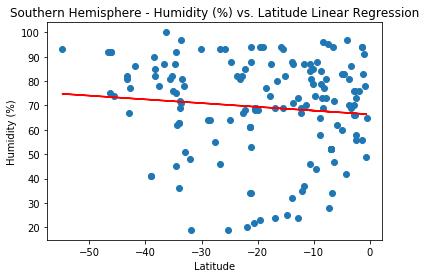

In [24]:
# Scatterplot of Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(south_hemisphere['Lat'],south_hemisphere['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.plot(south_hemisphere['Lat'],fit4,color='red')
print(f'The r-value is: {rval**2}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
# Linear Regression for Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
slope5,intercept5,rval5,pval5,std_err5 = stats.linregress(north_hemisphere['Lat'],north_hemisphere['Cloudiness'])
fit5 = slope5 * north_hemisphere['Lat'] + intercept5

The r-value is: 0.7199131169520904


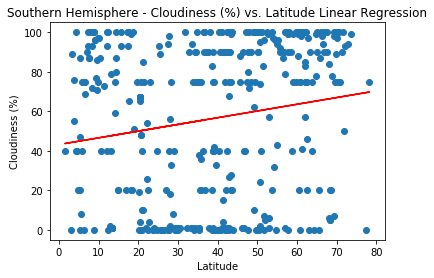

In [31]:
# Scatterplot of Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(north_hemisphere['Lat'],north_hemisphere['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.plot(north_hemisphere['Lat'],fit5,color='red')
print(f'The r-value is: {rval**2}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [33]:
# Linear Regression for Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
slope6,intercept6,rval6,pval6,std_err6 = stats.linregress(south_hemisphere['Lat'],south_hemisphere['Cloudiness'])
fit6 = slope6 * south_hemisphere['Lat'] + intercept6

The r-value is: 0.7199131169520904


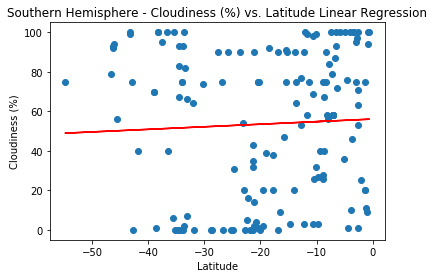

In [34]:
# Scatterplot of Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(south_hemisphere['Lat'],south_hemisphere['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.plot(south_hemisphere['Lat'],fit6,color='red')
print(f'The r-value is: {rval**2}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [36]:
# Linear Regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
slope7,intercept7,rval7,pval7,std_err7 = stats.linregress(north_hemisphere['Lat'],north_hemisphere['Wind Speed'])
fit7 = slope7 * north_hemisphere['Lat'] + intercept7

The r-value is: 0.7199131169520904


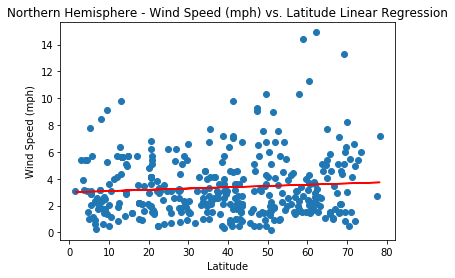

In [37]:
# Scatterplot of Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(north_hemisphere['Lat'],north_hemisphere['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.plot(north_hemisphere['Lat'],fit7,color='red')
print(f'The r-value is: {rval**2}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [39]:
# Linear Regression for Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
slope8,intercept8,rval8,pval8,std_err8 = stats.linregress(south_hemisphere['Lat'],south_hemisphere['Wind Speed'])
fit8 = slope8 * south_hemisphere['Lat'] + intercept8

The r-value is: 0.7199131169520904


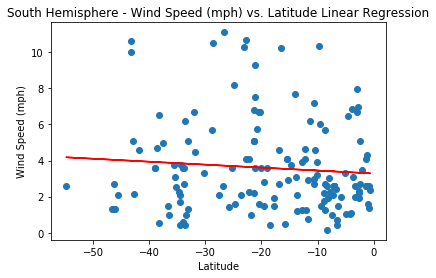

In [41]:
# Scatterplot of Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(south_hemisphere['Lat'],south_hemisphere['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('South Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.plot(south_hemisphere['Lat'],fit8,color='red')
print(f'The r-value is: {rval**2}')